## ML Review and Gradient Descent Example

În acest caiet, vom rezolva o problemă simplă de regresie liniară folosind descenta gradientului.
Vom vedea efectul ratei de învățare asupra traiectoriei în spațiul parametrilor.
Vom arăta cum diferențiază Descenta Gradientului Stochastic (SGD) de versiunea standard și efectul "amestecării" datelor tale în timpul SGD.

In [1]:
import sys
sys.version

'3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]'

In [2]:
# Preliminaries - packages to load

from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generare date dintr-o distribuție cunoscută
Mai jos vom genera date dintr-o distribuție cunoscută.
În mod specific, modelul real este:

$Y = b + \theta_1 X_1 + \theta_2 X_2 + \epsilon$

$X_1$ și $X_2$ au o distribuție uniformă în intervalul $[0,10]$, în timp ce const este un vector de uni (reprezentând termenul de interceptare).

Setăm valori reale pentru $b$, $\theta_1$ și $\theta_2$.

Aici $b=1.5$, $\theta_1=2$, și $\theta_2=5$.

Apoi generăm un vector de valori $y$ conform modelului și punem predictorii împreună într-o "matrice de caracteristici" x_mat.

In [3]:
np.random.seed(1234)  ## Acest lucru asigură că obținem aceleași date dacă toți ceilalți parametri rămân fixați.

num_obs = 100
x1 = np.random.uniform(0,10,num_obs)
x2 = np.random.uniform(0,10,num_obs)
const = np.ones(num_obs)
eps = np.random.normal(0,.5,num_obs)

b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const+ theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const,x1,x2]).T

## Obțineți răspunsul "Corect" direct
În celulele de mai jos rezolvăm pentru setul optim de coeficienți. Rețineți că, chiar dacă modelul real este dat de:

$b=1.5$, $\theta_1=2$, și $\theta_2=5$

Estimarea maximă a probabilității (celor mai mici pătrate) dintr-un set finit de date poate fi ușor diferită.

## Exercițiu:
Rezolvați problema în două moduri:
1. Folosind modelul LinearRegression din scikit-learn
2. Utilizând algebra matriceală direct prin formula $\theta = (X^T X)^{-1}X^Ty$

Notă: Solverul scikit-learn poate afișa un mesaj de avertizare, acesta poate fi ignorat.

In [4]:
### Rezolvă direct folosind scikit-learn:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

In [5]:
## Rezolvă prin calcul matriceal:
np.linalg.inv(np.dot(x_mat.T,x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

## Soluționând prin Gradient Descent:
O altă modalitate de a rezolva această problemă este folosind metoda Gradient Descent. Vom explora această metodă deoarece (după cum vom vedea) Rețelele Neuronale sunt antrenate prin Gradient Descent. Înțelegerea modului în care funcționează gradientul descendent pe un exemplu simplu va construi intuiția și ne va ajuta să înțelegem unele din subtilitățile legate de setarea ratei de învățare. De asemenea, vom explora Gradientul Descendent Stochastic și vom compara comportamentul său cu abordarea standard.

## Exersează

Următoarele celule conțin cod pentru a efectua gradient descent (pe întreaga set de date). Am omis câțiva parametri pentru tine să completezi.

1. Alege o rată de învățare și un număr de iterații, rulează codul, apoi trasează traiectoria gradient descent-ului tău.
1. Găsește exemple în care rata de învățare este prea mare, prea mică și "potrivită".
1. Uită-te la graficele funcției de pierdere în aceste condiții.



In [6]:
## Parametri cu care să experimentezi:
learning_rate = .001 # am modificat cu .001
num_iter = 100 # am modificat cu 100
theta_initial = np.array([3,3,3])
print(theta_initial)

[3 3 3]


In [7]:
## Pași de inițializare
theta = theta_initial
theta_path = np.zeros((num_iter+1,3))
theta_path[0,:]= theta_initial

loss_vec = np.zeros(num_iter)

## Buclele principale ale Gradient Descent (pentru un număr fix de iterații)
for i in range(num_iter):
    y_pred = np.dot(theta.T,x_mat.T)
    loss_vec[i] = np.sum((y-y_pred)**2)
    grad_vec = (y-y_pred).dot(x_mat)/num_obs  #sumează gradienții pentru toate observațiile și împarte la numărul de observații.
    grad_vec = grad_vec
    theta = theta + learning_rate*grad_vec
    theta_path[i+1,:]=theta

[6030.84477131 5688.39319737 5382.14185518 5107.66868157 4861.10338289
 4639.05839187 4438.56846713 4257.03785335 4092.19405573 3942.04740062
 3804.85565812 3679.09309286 3563.42338877 3456.67596269 3357.82524283
 3265.97254073 3180.3301922  3100.2076831  3024.99951165 2954.17456967
 2887.26685284 2823.86733342 2763.61685008 2706.1998874  2651.3391337
 2598.79071985 2548.34005367 2499.79817552 2452.99856977 2407.79437505
 2364.05594342 2321.6687048  2280.53129841 2240.55393775 2201.65698008
 2163.76967455 2126.82906681 2090.77904048 2055.56947823 2021.15552773
 1987.49695908 1954.55760252 1922.30485615 1890.70925516 1859.74409455
 1829.38509897 1799.61013357 1770.39895082 1741.73296873 1713.59507671
 1685.96946538 1658.84147751 1632.19747738 1606.02473629 1580.31133217
 1555.04606152 1530.21836217 1505.81824554 1481.83623714 1458.26332429
 1435.09091024 1412.31077382 1389.91503391 1367.89611823 1346.24673581
 1324.95985272 1304.02867072 1283.44660827 1263.20728394 1243.30450151
 1223.7

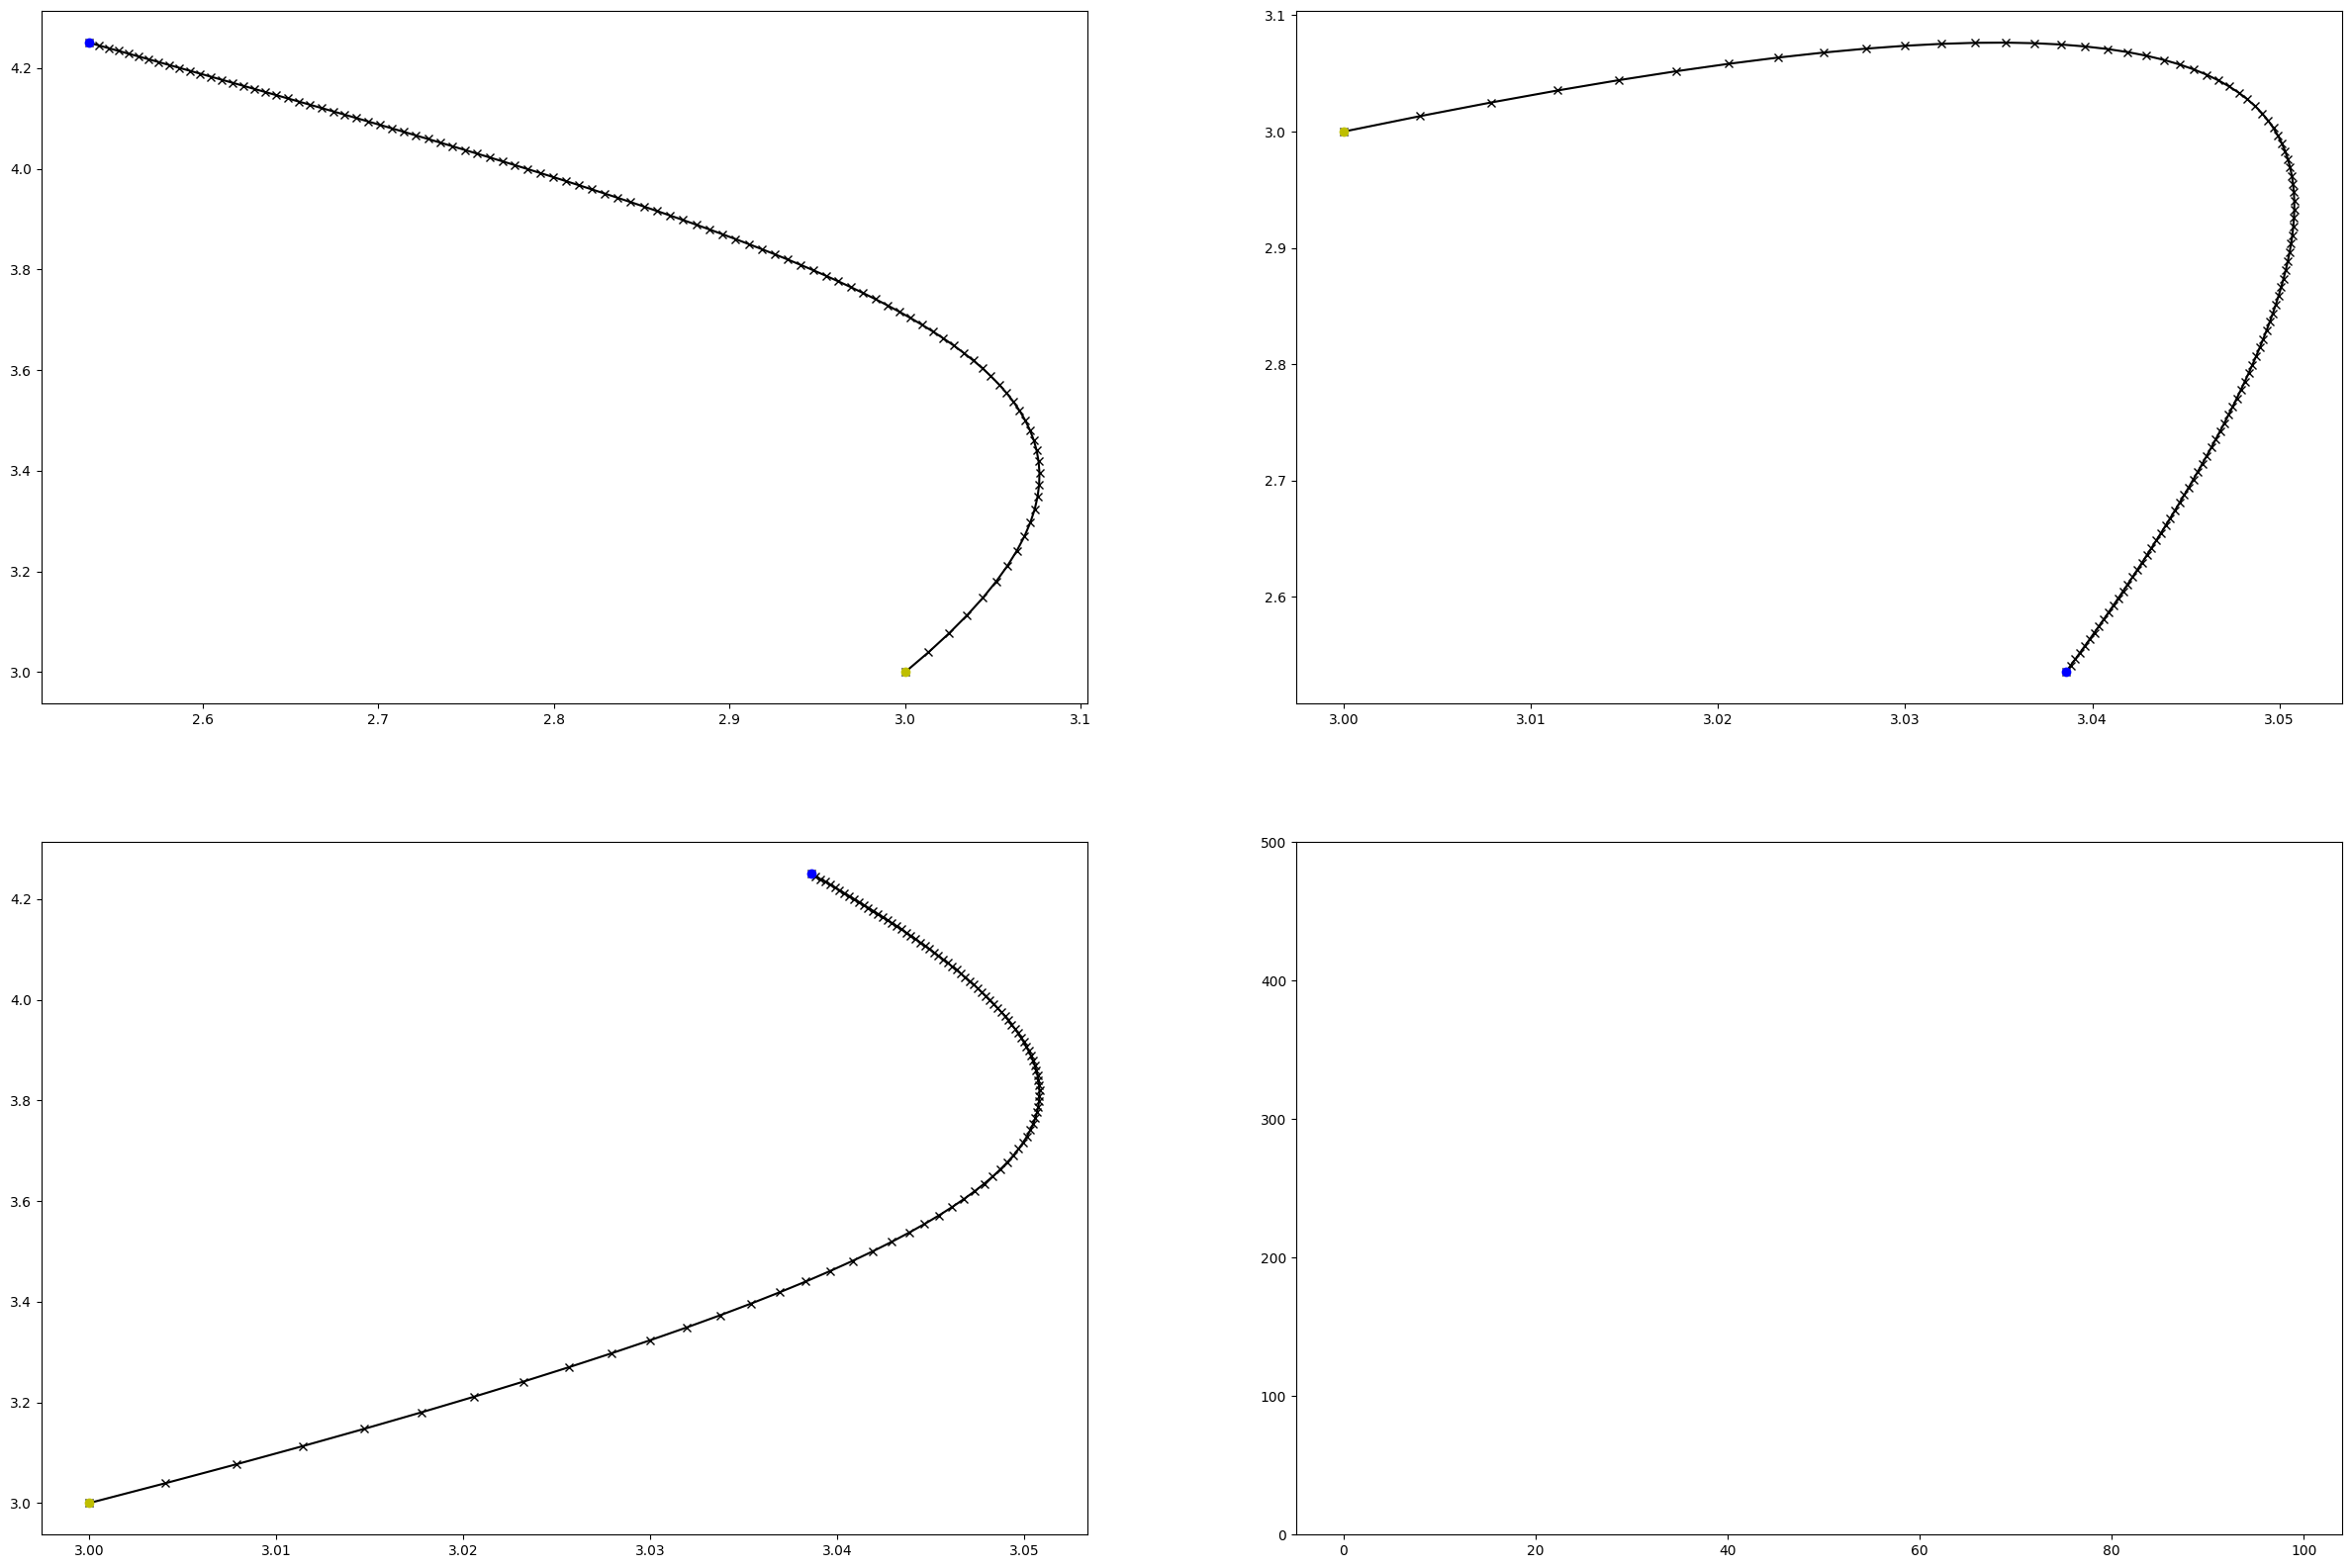

In [8]:
    
## Trasează rezultatele - este un spațiu de parametri 3D - vom trasa feliile 2D
## Verde reprezintă punctul de pornire și albastru punctul de finalizare
plt.figure(figsize = (30,20))
plt.subplot(2,2,1)
plt.plot(theta_path[:,1],theta_path[:,2],'k-x')
plt.plot(theta_path[0,1],theta_path[0,2],'yo')
plt.plot(theta_path[-1,1],theta_path[-1,2],'bo')
plt.subplot(2,2,2)
plt.plot(theta_path[:,0],theta_path[:,1],'k-x')
plt.plot(theta_path[0,0],theta_path[0,1],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,1],'bo')

plt.subplot(2,2,3)
plt.plot(theta_path[:,0],theta_path[:,2],'k-x')
plt.plot(theta_path[0,0],theta_path[0,2],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,2],'bo')

plt.subplot(2,2,4)
plt.plot(loss_vec)
plt.ylim([0,500])

## Trasează funcția de pierdere
print(loss_vec)

## Stochastic Gradient Descent
În loc să facem media gradienților pe întregul set de date înainte de a face un pas, acum vom face un pas pentru fiecare punct de date. Fiecare pas va fi într-o oarecare măsură o "suprareacție", dar acestea ar trebui să se echilibreze în medie.

## Exersează
Codul de mai jos rulează Stochastic Gradient Descent, dar trece prin date în aceeași ordine de fiecare dată. 

1. Rulează codul și trasează graficele. Ce observi?

Observ ca graficele raman neschimbate, ele apar in aceeasi ordine adica se realizeaza o actualizare a theta pentru fiecare punct de date si se salveaza traiectoriile si pierderile pentru vizualizare.
2. Modifică codul astfel încât să reordoneze aleator datele. Cum se compară traiectoriile de eșantionare? 

Traiectoriile se schimba la fiecare executie in mod random. Am modificat si adaugat aceste doua linii de program.

### shuffled_indices = np.random.permutation(num_obs)
### for j in shuffled_indices:

In [9]:
## Parametri cu care să experimentezi:
learning_rate = .002
num_iter = 10 #Numărul de "pași" va fi num_iter * numobs
theta_initial = np.array([3,3,3])

In [10]:
## Pașii de inițializare
theta = theta_initial
theta_path = np.zeros(((num_iter*num_obs)+1,3))
theta_path[0,:]= theta_initial
loss_vec = np.zeros(num_iter*num_obs)

In [11]:
## Buclele principale pentru SGD
count=0
for i in range(num_iter):
    shuffled_indices = np.random.permutation(num_obs)
    for j in shuffled_indices:
        count+=1
        y_pred = np.dot(theta.T,x_mat.T)
        loss_vec[count-1] = np.sum((y-y_pred)**2)
        grad_vec = (y[j]-y_pred[j])*(x_mat[j,:])
        theta = theta + learning_rate*grad_vec
        theta_path[count,:]=theta

(0.0, 500.0)

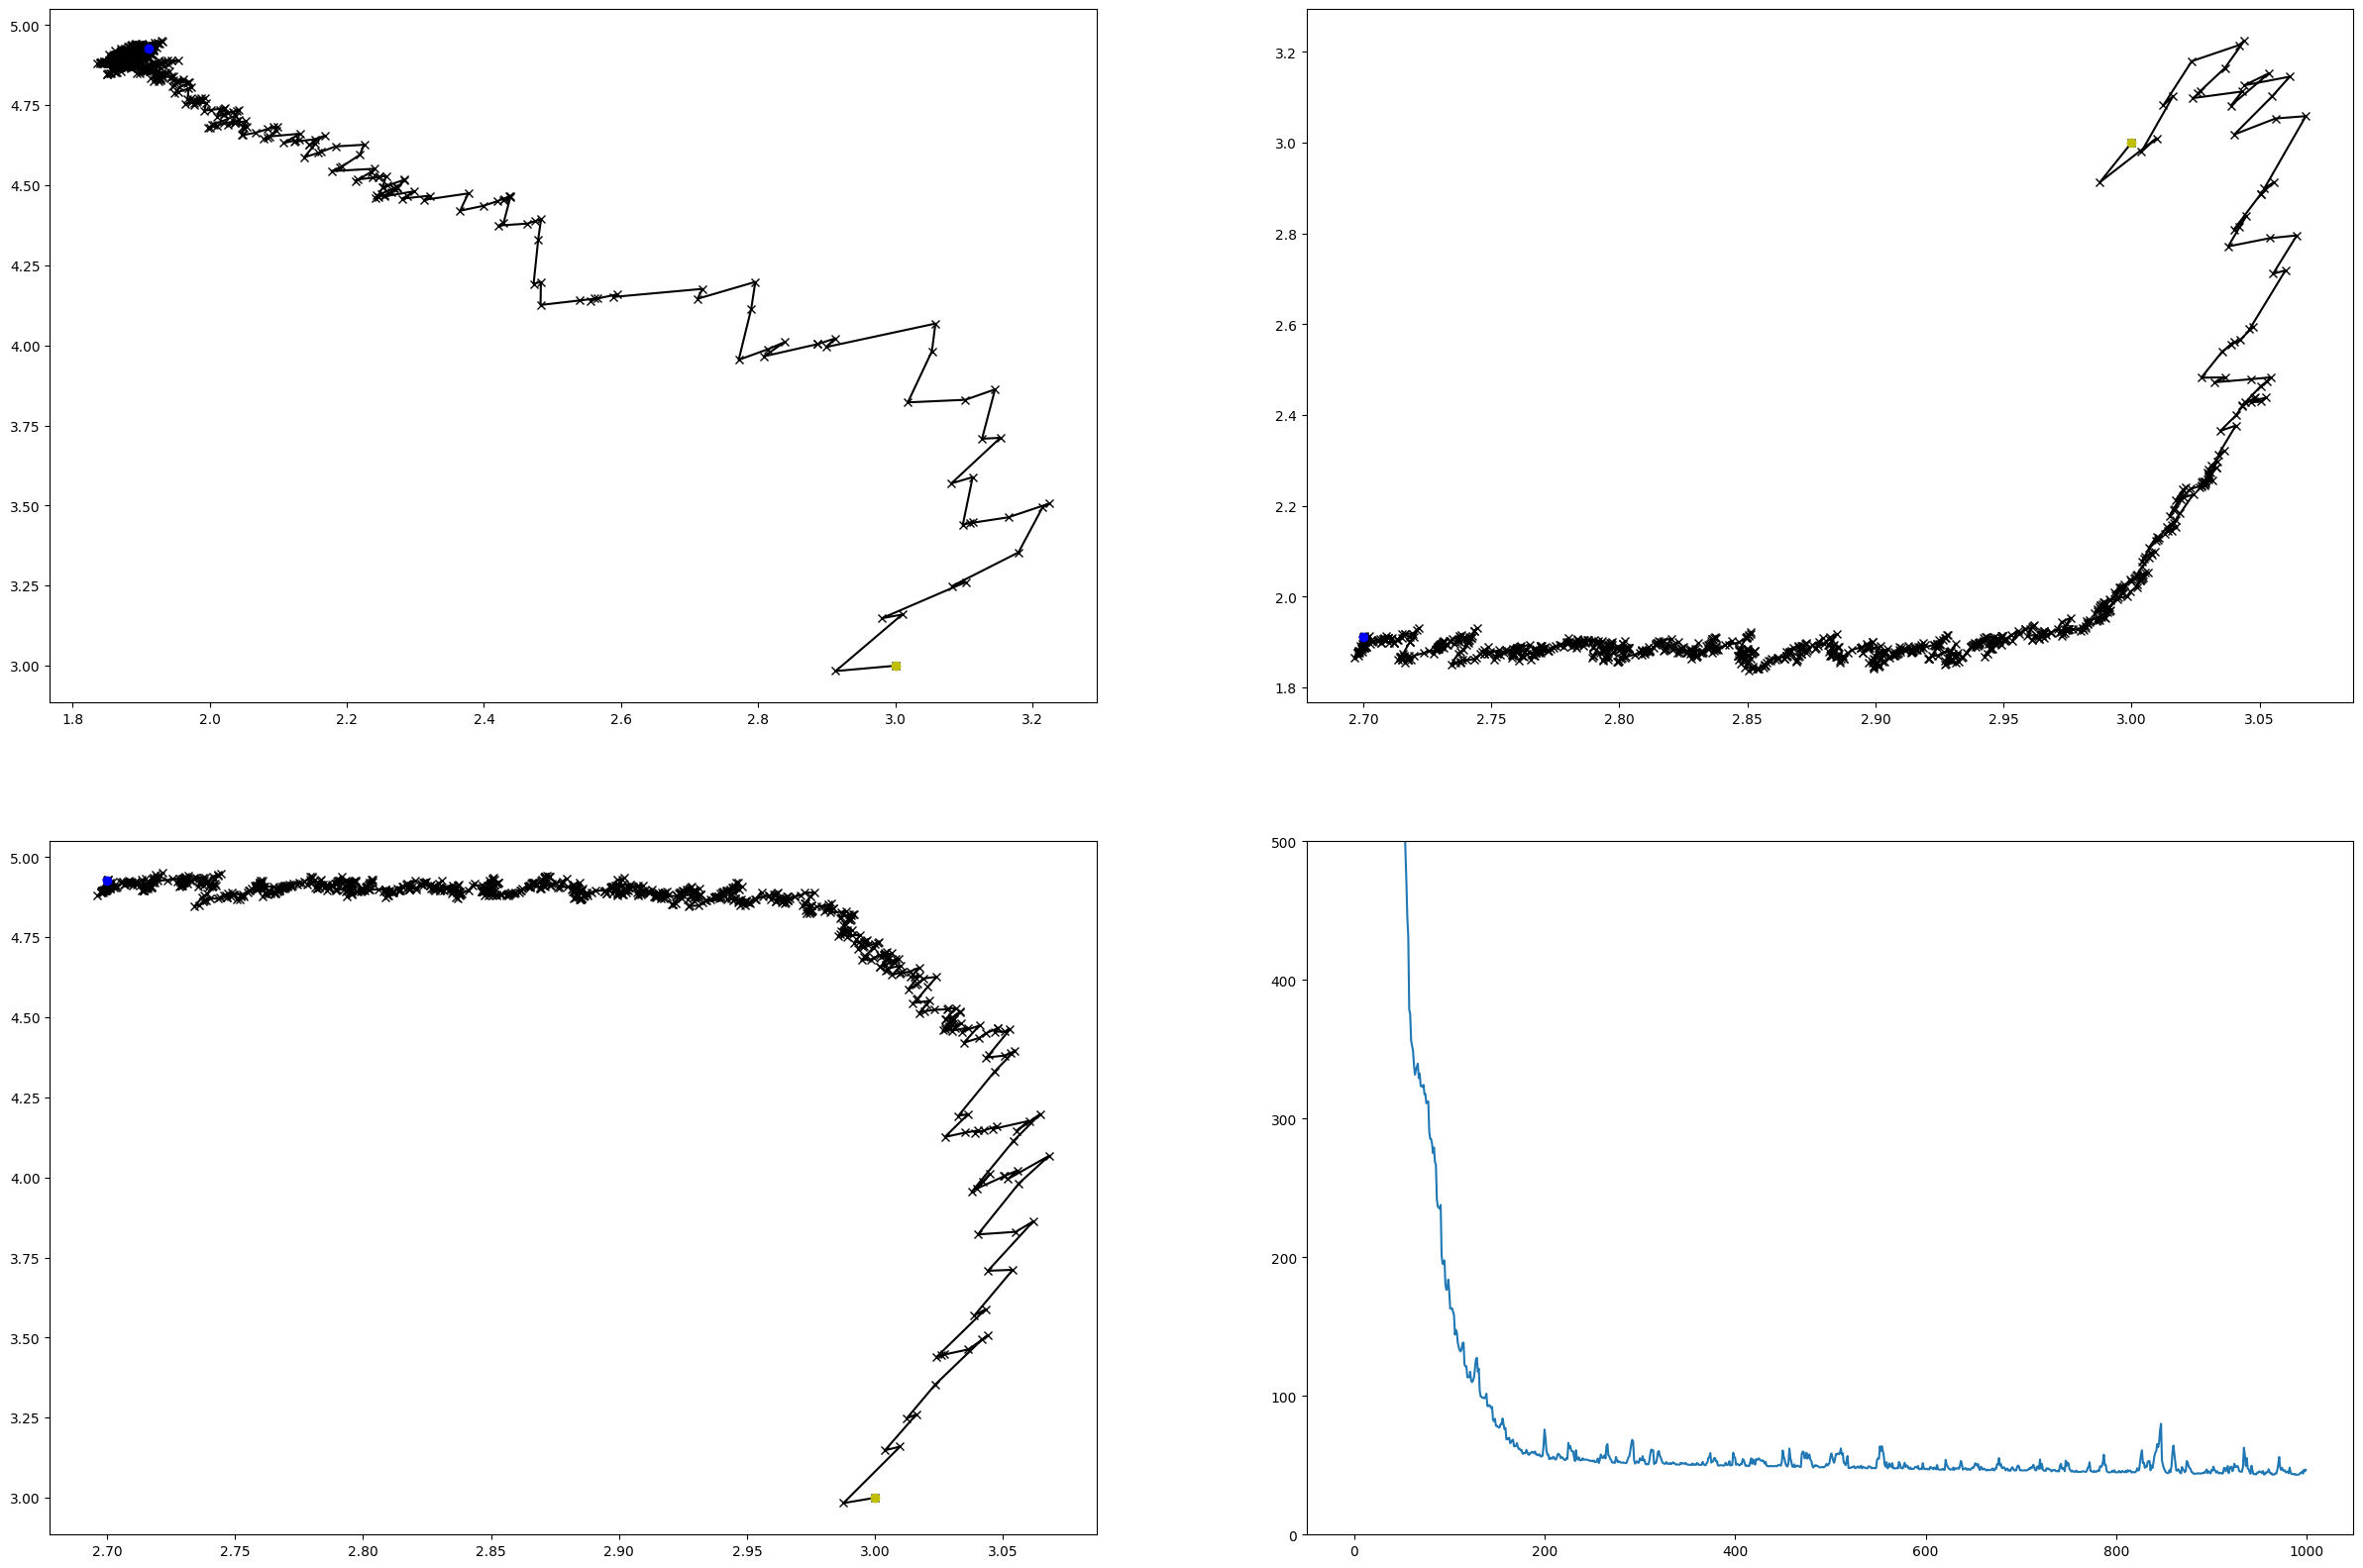

In [12]:
## Trasează rezultatele - este un spațiu de parametri 3D - vom trasa feliile 2D
## Verde reprezintă punctul de pornire și albastru punctul de finalizare
plt.figure(figsize = (30,20))
plt.subplot(2,2,1)
plt.plot(theta_path[:,1],theta_path[:,2],'k-x')
plt.plot(theta_path[0,1],theta_path[0,2],'yo')
plt.plot(theta_path[-1,1],theta_path[-1,2],'bo')
plt.subplot(2,2,2)
plt.plot(theta_path[:,0],theta_path[:,1],'k-x')
plt.plot(theta_path[0,0],theta_path[0,1],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,1],'bo')

plt.subplot(2,2,3)
plt.plot(theta_path[:,0],theta_path[:,2],'k-x')
plt.plot(theta_path[0,0],theta_path[0,2],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,2],'bo')

plt.subplot(2,2,4)
plt.plot(loss_vec)
plt.ylim([0,500])

In [103]:
## Studentul să scrie codul mai jos.

In [ ]:
Modificarile au fost efectuate direct in program.